# TP 1. Régression linéaire simple

Nous disposons de données concernant la vitesse de véhicules sur la route, variable SPEED, et du nombre de voiture pour chacune de ces vitesses moyennes, variable DENSITY.

Nous voulons prédire l'impact du nombre de voitures sur la vitesses de celles-ci avec le modèle

$$\sqrt{\text{SPEED}} = \beta_{0} + \beta_{1} * \text{DENSITY}$$.

Nous utilisons les librairies
- **Matplotlib :** permet la réalisation de graphes de visualisation (https://matplotlib.org/)
- **Pandas :** permet de manipuler 'facilement' les données sous forme de dataframes comme dans R (http://pandas.pydata.org/)
- **NumPy :** contient des routines de calculs scientifiques (http://www.numpy.org/)
- **Scikit-Learn :** boîte à outils de machine learning (http://scikit-learn.org/stable/index.html).

**Remarque :** Vous pouvez intégrer des formules mathématiques du type **Tex/LaTex** dans les notebook Jupyter au format **MathJax** (https://docs.mathjax.org/en/latest/index.html).

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Chargement et visualisation des données

### Chargement des données


Chargement des données avec Pandas (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). Nous obtenons la dataframe 'data'.

In [7]:
data = pd.read_csv('data/E1.1', delimiter = " ")
print(data)

    DENSITY  SPEED
0      20.4   38.8
1      27.4   31.5
2     106.2   10.6
3      80.4   16.1
4     141.3    7.7
5     130.9    8.3
6     121.7    8.5
7     106.5   11.1
8     130.5    8.6
9     101.1   11.1
10    123.9    9.8
11    144.2    7.8
12     29.5   31.8
13     30.8   31.6
14     26.5   34.0
15     35.7   28.9
16     30.0   28.8
17    106.2   10.5
18     97.0   12.3
19     90.1   13.2
20    106.7   11.4
21     99.3   11.2
22    107.2   10.3
23    109.1   11.4


Calcul de la racine carrée de SPEED, SQRT_SPEED, que l'on ajoute à la dataframe 'data'

In [8]:
data = data.assign(SQRT_SPEED = np.sqrt(data.SPEED))
print(data.head())
print(data.tail())

   DENSITY  SPEED  SQRT_SPEED
0     20.4   38.8    6.228965
1     27.4   31.5    5.612486
2    106.2   10.6    3.255764
3     80.4   16.1    4.012481
4    141.3    7.7    2.774887
    DENSITY  SPEED  SQRT_SPEED
19     90.1   13.2    3.633180
20    106.7   11.4    3.376389
21     99.3   11.2    3.346640
22    107.2   10.3    3.209361
23    109.1   11.4    3.376389


In [9]:
# Statistiques sur les variables de notre échantillon
print(data.describe())

          DENSITY      SPEED  SQRT_SPEED
count   24.000000  24.000000   24.000000
mean    87.608333  16.887500    3.946820
std     41.438954  10.342244    1.169220
min     20.400000   7.700000    2.774887
25%     34.475000  10.175000    3.189645
50%    103.650000  11.300000    3.361514
75%    112.250000  28.825000    5.368890
max    144.200000  38.800000    6.228965


### Graphe des données

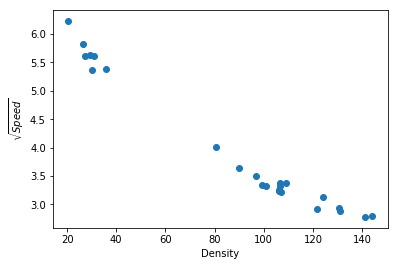

In [10]:
plt.scatter(data.DENSITY, data.SQRT_SPEED)
plt.xlabel("Density")
plt.ylabel("$\sqrt{Speed}$")
plt.show()

## 2. Calculs manuels

In [11]:
# Nombre d'observations
m = data.SPEED.size
# Moyenne de SQRT_SPEED
mean_SQRT_SPEED = data.SQRT_SPEED.mean()
# Moyenne de DENSITY
mean_DENSITY = data.DENSITY.mean()
print("Nombre d'observations : {0}".format(m))
print('Moyenne SQRT_SPEED    : {0}'.format(mean_SQRT_SPEED))
print('Moyenne DENSITY       : {0}'.format(mean_DENSITY))

Nombre d'observations : 24
Moyenne SQRT_SPEED    : 3.946819612437029
Moyenne DENSITY       : 87.60833333333335


Calcul des estimateurs de moindres carrés \\( b_{0}^{*}\\), \\( b_{1}^{*}\\) des coefficients \\( \beta_{0} \\) et \\( \beta_{1} \\)

In [12]:
# Remarque sur les types Python/Pandas/Numpy
print(type(mean_DENSITY))
print(type(data.SPEED))
print(type(data.SPEED.values))

<class 'float'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [13]:
b1 = (np.sum(data.SQRT_SPEED.values * data.DENSITY.values) - m * mean_SQRT_SPEED * mean_DENSITY) \
    / (np.sum(np.square(data.DENSITY.values)) - m * mean_DENSITY * mean_DENSITY)
b0 = mean_SQRT_SPEED - b1 * mean_DENSITY
print('b1 = {0}'.format(b1))
print('b0 = {0}'.format(b0))

b1 = -0.02777039496126911
b0 = 6.3797376310022145


Graphe du modèle empirique

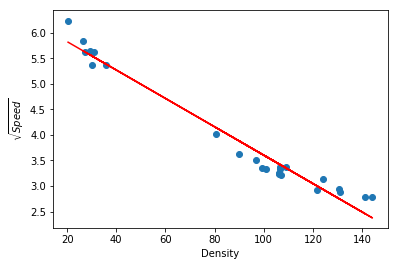

In [14]:
plt.scatter(data.DENSITY, data.SQRT_SPEED)
plt.plot(data.DENSITY, b0 + b1 * data.DENSITY, color='red')
plt.xlabel("Density")
plt.ylabel("$\sqrt{Speed}$")
plt.show()

Calcul des prédictions \\( \hat{\sqrt{\text{SPEED}}}_{i} = b_{0}^{*} + b_{1}^{*} \text{DENSITY}_{i} \\)

In [15]:
pred = b0  + b1 * data.DENSITY.values
pred

array([5.81322157, 5.61882881, 3.43052169, 4.14699788, 2.45578082,
       2.74459293, 3.00008056, 3.42219057, 2.75570109, 3.5721507 ,
       2.9389857 , 2.37524668, 5.56051098, 5.52440947, 5.64382216,
       5.38833453, 5.54662578, 3.43052169, 3.68600932, 3.87762504,
       3.41663649, 3.62213741, 3.40275129, 3.34998754])

Calcul des résidus (erreurs empiriques) \\( e_{i} = \sqrt{\text{SPEED}}_{i} - \hat{\sqrt{\text{SPEED}}}_{i} \\)

In [16]:
e = data.SQRT_SPEED.values - pred
print(e)
print('Somme des rédidus = {0}'.format(sum(e)))

[ 0.41574303 -0.00634273 -0.17475757 -0.13451735  0.31910656  0.13637913
 -0.08460462 -0.09052432  0.17687457 -0.24048445  0.19150947  0.41760133
  0.07863789  0.09697826  0.18712973 -0.01246251 -0.18006264 -0.19015134
 -0.17887374 -0.24444462 -0.04024789 -0.27549731 -0.19338998  0.02640106]
Somme des rédidus = -1.3322676295501878e-15


Graphe des résidus en fonction de la variable DENSITY

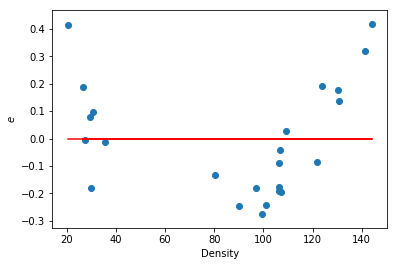

In [17]:
plt.scatter(data.DENSITY, e)
plt.plot(data.DENSITY, np.zeros(data.DENSITY.size), color='red')
plt.xlabel("Density")
plt.ylabel("$e$")
plt.show()

## 3. Calculs avec le package Scikit-Learn

In [18]:
from sklearn import linear_model

Instanciation d'un objet LinearRegression (http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [19]:
model = linear_model.LinearRegression()

Entrainement/ajustement du model afin de déterminer les meilleurs coefficients.

**Remarque :** La fonction fit() attend un tableau à 2 dimensions. data.Density.value est un tableau à une 1 dimension. Il faut utiliser la fonction reshape() afin de reformater le tableau (https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

In [20]:
print(data.DENSITY.shape)
print(data.DENSITY.values.shape)
print(data.DENSITY.values.reshape(-1,1).shape)

(24,)
(24,)
(24, 1)


In [21]:
model.fit (data.DENSITY.values.reshape(-1,1), data.SQRT_SPEED.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Récupération des coefficients de la régression linéaire

In [22]:
print(model.coef_)
print("b1 = {0}".format(model.coef_[0]))
print("b0 = {0}".format(model.intercept_))

[-0.02777039]
b1 = -0.027770394961269082
b0 = 6.379737631002213


Calcul des predictions sur l'échantillon d'entrainement

In [23]:
pred1 = model.predict(data.DENSITY.values.reshape(-1,1))
print(pred1)

[5.81322157 5.61882881 3.43052169 4.14699788 2.45578082 2.74459293
 3.00008056 3.42219057 2.75570109 3.5721507  2.9389857  2.37524668
 5.56051098 5.52440947 5.64382216 5.38833453 5.54662578 3.43052169
 3.68600932 3.87762504 3.41663649 3.62213741 3.40275129 3.34998754]


In [24]:
print(sum(pred1 - pred))

1.7319479184152442e-14
